#simple predict that it is rock or mine 

#importing necessary dependencies:
import

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier 
import pickle

In [3]:
#laoding data 
sonar_data = pd.read_csv('sonar data.csv')

In [4]:
sonar_data.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [5]:
# Display the first 5 rows
print("First 5 rows of the data:")
print(sonar_data.head())
 


First 5 rows of the data:
   0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  \
0  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
1  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
2  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
3  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
4  0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   

   0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084  \
0  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
1  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
2  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
3  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   
4  0.3039  ...  0.0045  0.0014  0.0038  0.0013  0.0089  0.0057  0.0027   

   0.0090  0.0032  R  
0  0.0052  0.0044  R  
1  0.0095  0.0078  R

In [5]:
# Get the shape of the data
print("\nShape of the data:")
print(sonar_data.shape)


Shape of the data:
(208, 61)


In [6]:
# Get descriptive statistics
print("\nDescriptive statistics:")
print(sonar_data.describe())


Descriptive statistics:
               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.

In [7]:
# Count the occurrences of each class ('R' and 'M')
print("\nClass distribution:")
print(sonar_data[60].value_counts())


Class distribution:
60
M    111
R     97
Name: count, dtype: int64


In [8]:
 # Group by class and calculate the mean of each feature
print("\nMean values grouped by class:")
print(sonar_data.groupby(60).mean())



Mean values grouped by class:
          0         1         2         3         4         5         6   \
60                                                                         
M   0.034989  0.045544  0.050720  0.064768  0.086715  0.111864  0.128359   
R   0.022498  0.030303  0.035951  0.041447  0.062028  0.096224  0.114180   

          7         8         9   ...        50        51        52        53  \
60                                ...                                           
M   0.149832  0.213492  0.251022  ...  0.019352  0.016014  0.011643  0.012185   
R   0.117596  0.137392  0.159325  ...  0.012311  0.010453  0.009640  0.009518   

          54        55        56        57        58        59  
60                                                              
M   0.009923  0.008914  0.007825  0.009060  0.008695  0.006930  
R   0.008567  0.007430  0.007814  0.006677  0.007078  0.006024  

[2 rows x 60 columns]


In [9]:
#Correlation Heatmap 
correlation_matrix = sonar_data.iloc[:, :-1].corr()


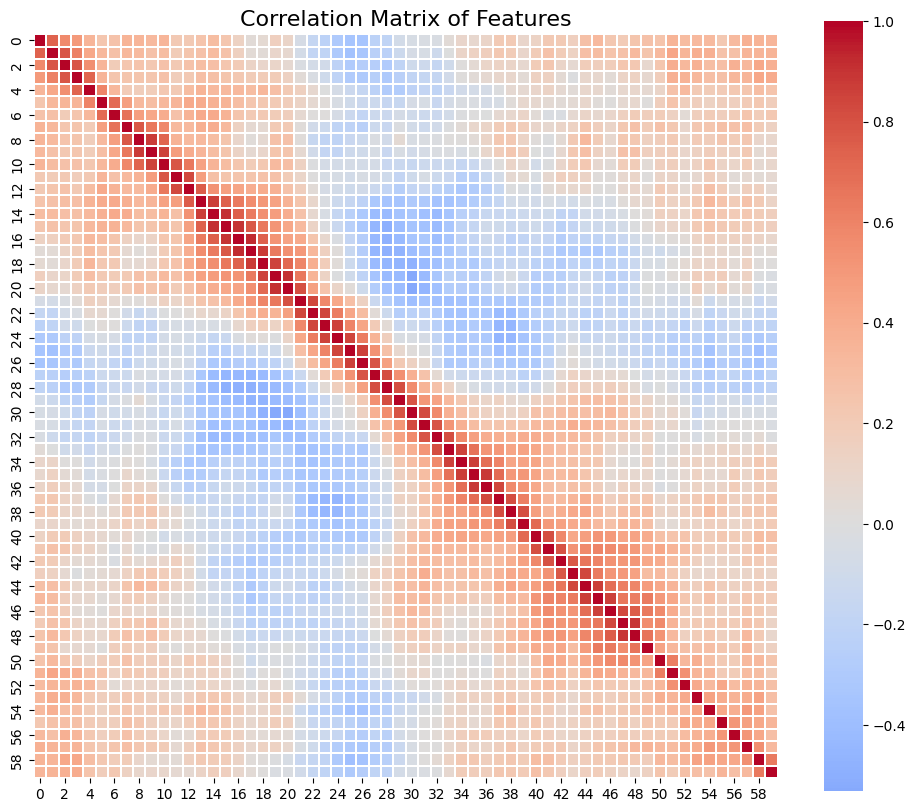

In [10]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, linewidths=0.1,linecolor='white', square=True)
plt.title('Correlation Matrix of Features', fontsize=16)
plt.show()

In [11]:
# Data Preprocessing

# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [12]:
# Fit and transform the target variable ('R' -> 0, 'M' -> 1)
sonar_data['label'] = label_encoder.fit_transform(sonar_data[60])
sonar_data = sonar_data.drop(columns=[60])

In [13]:
# Verify the encoding
print("\nClass distribution after encoding:")
print(sonar_data['label'].value_counts())
print("\nFirst 5 rows after encoding:")
print(sonar_data.head())
 


Class distribution after encoding:
label
0    111
1     97
Name: count, dtype: int64

First 5 rows after encoding:
        0       1       2       3       4       5       6       7       8  \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

        9  ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0

Splitting Data into Training and Testing Sets

In [14]:
# Separate features (X) and target (y)
X = sonar_data.drop(columns=['label'], axis=1)  # Features
y = sonar_data['label']  # Target

In [15]:
# Split the data into training and testing sets (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,stratify=y, random_state=1)

In [16]:
print("\nShape of X, X_train, X_test:")
print(X.shape, X_train.shape, X_test.shape)
print("\nShape of y, y_train, y_test:")
print(y.shape, y_train.shape, y_test.shape)


Shape of X, X_train, X_test:
(208, 60) (187, 60) (21, 60)

Shape of y, y_train, y_test:
(208,) (187,) (21,)


Logistic Regression 

In [17]:
print("\n--- Logistic Regression ---")
model = LogisticRegression()
model.fit(X_train, y_train)


--- Logistic Regression ---


LogisticRegression()

In [18]:
# Accuracy on training data (Logistic Regression)
lr_train_pred = model.predict(X_train)
lr_train_acc = accuracy_score(lr_train_pred, y_train)
print('Accuracy on Training data (Logistic Regression): ', lr_train_acc)

Accuracy on Training data (Logistic Regression):  0.8342245989304813


In [19]:
# Accuracy on test data (Logistic Regression)
lr_test_pred = model.predict(X_test)
lr_test_acc = accuracy_score(lr_test_pred, y_test)
print('Accuracy on Test data (Logistic Regression): ', lr_test_acc)

Accuracy on Test data (Logistic Regression):  0.7619047619047619


Random Forest

In [20]:
print("\n--- Random Forest ---")
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)


--- Random Forest ---


RandomForestClassifier(random_state=1)

In [21]:
# Accuracy on training data (Random Forest)
rf_train_pred = rf_model.predict(X_train)
rf_train_acc = accuracy_score(rf_train_pred, y_train)
print('Accuracy on Training data (Random Forest): ', rf_train_acc)


Accuracy on Training data (Random Forest):  1.0


In [22]:
# Accuracy on test data (Random Forest)
rf_test_pred = rf_model.predict(X_test)
rf_test_acc = accuracy_score(rf_test_pred, y_test)
print('Accuracy on Test data (Random Forest): ', rf_test_acc)

Accuracy on Test data (Random Forest):  0.7619047619047619


Making Predictions on New Data

In [23]:
# Convert and reshape input data
input_data = (0.0164, 0.0627, 0.0738, 0.0608, 0.0233, 0.1048, 0.1338, 0.0644,
              0.1522, 0.0780, 0.1791, 0.2681, 0.1788, 0.1039, 0.1980, 0.3234,
              0.3748, 0.2586, 0.3680, 0.3508, 0.5606, 0.5231, 0.5469, 0.6954,
              0.6352, 0.6757, 0.8499, 0.8025, 0.6563, 0.8591, 0.6655, 0.5369,
              0.3118, 0.3763, 0.2801, 0.0875, 0.3319, 0.4237, 0.1801, 0.3743,
              0.4627, 0.1614, 0.2494, 0.3202, 0.2265, 0.1146, 0.0476, 0.0943,
              0.0824, 0.0171, 0.0244, 0.0258, 0.0143, 0.0226, 0.0187, 0.0185,
              0.0110, 0.0094, 0.0078, 0.0112)

In [24]:
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

In [25]:
 # Predict using Logistic Regression
prediction_lr = model.predict(input_data_reshaped)
print("\nLogistic Regression Prediction:", prediction_lr)
print("Logistic Regression: The object is a Mine 💣" if prediction_lr[0] == 1 else
      "Logistic Regression: The object is a Rock ⛰️")


Logistic Regression Prediction: [0]
Logistic Regression: The object is a Rock ⛰️


In [26]:
 # Predict using Random Forest
prediction_rf = rf_model.predict(input_data_reshaped)
print("\nRandom Forest Prediction:", prediction_rf)
print("Random Forest: The object is a Mine 💣" if prediction_rf[0] == 1 else
       "Random Forest: The object is a Rock ⛰️")



Random Forest Prediction: [0]
Random Forest: The object is a Rock ⛰️


In [27]:
print("\nSaving models...")
pickle.dump(model, open('logistic_regression_model.pkl', 'wb'))
pickle.dump(rf_model, open('random_forest_model.pkl', 'wb'))
print("Models saved successfully!")


Saving models...
Models saved successfully!


In [28]:


# Save the logistic regression model
pickle.dump(model, open('logistic_regression_model.pkl', 'wb'))

# Save the random forest model
pickle.dump(rf_model, open('random_forest_model.pkl', 'wb'))


In [29]:
prediction_lr_proba = model.predict_proba(input_data_reshaped)
print("Logistic Regression Probabilities:", prediction_lr_proba)

prediction_rf_proba = rf_model.predict_proba(input_data_reshaped)
print("Random Forest Probabilities:", prediction_rf_proba)

Logistic Regression Probabilities: [[0.5388168 0.4611832]]
Random Forest Probabilities: [[0.87 0.13]]
